In [1]:
#Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Reading the loan.csv dataset into a dataframe
# Using low memory command in order to handle multiple datatypes in the dataframe
df= pd.read_csv("loan.csv",low_memory=True)

### 1. Taking a look at the dataset

In [4]:
# Printing the size of the dataset
df.shape

(39717, 111)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
# Checking the columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
# Checking the datatypes of each column in the dataframe
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

### 2. Data Cleaning

#### Checking the percentage of empty rows in each column

In [8]:
(df.isnull().sum()/df.shape[0])*100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

#### Removing columns with null percentage > 30%

In [9]:
df1=pd.DataFrame((df.isnull().sum()/df.shape[0])*100)
df1.columns=['null_percent']

In [10]:
# Printing columns with null percentage > 30%
df1[df1['null_percent']>30]

,null_percent
desc,32.580507
mths_since_last_delinq,64.662487
mths_since_last_record,92.985372
next_pymnt_d,97.129693
mths_since_last_major_derog,100.000000
annual_inc_joint,100.000000
dti_joint,100.000000
verification_status_joint,100.000000
tot_coll_amt,100.000000
tot_cur_bal,100.000000


In [11]:
list(df1[df1['null_percent']>=30].index.values)

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_pa

In [12]:
df=df.drop(list(df1[df1['null_percent']>=30].index.values),axis=1)

In [13]:
# Checking for columns having null_percent>0 in df
(df.isnull().sum()/df.shape[0])*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [14]:
# Replacing the Null values emp_title and title columns with 'Unknown'
df['emp_title']=df['emp_title'].fillna('Unknown')
df['title']=df['title'].fillna('Unknown')

In [15]:
# Replacing emp_length column with mode value as it is a character column
mod=df['emp_length'].mode()[0]
df['emp_length']=df['emp_length'].fillna(mod)

In [16]:
# Extracting the integer from the string emp_length column
df['emp_length_number'] = df['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))

In [17]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [18]:
# collections_12_mths_ex_med and chargeoff_within_12_mths and tax liens can be put as 0?
df['collections_12_mths_ex_med']=df['collections_12_mths_ex_med'].fillna(0)
df['chargeoff_within_12_mths']=df['chargeoff_within_12_mths'].fillna(0)
df['tax_liens']=df['tax_liens'].fillna(0)

In [19]:
# Replacing pub_rec_bankruptcies column with median value as it is a numerical column
med=df['pub_rec_bankruptcies'].median()
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(med)

In [20]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'emp_length_number'],
      dtype='object')

#### Selecting only required columns

In [ ]:
# one of id, member_id,url can be used as primary key, so choosing id amd dropping ember_id and url
# employee_title and title will not help in analysis, hence dropping them as well
# 'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code','collections_12_mths_ex_med',
#'initial_list_status', 'pymnt_plan' columns have only one unique value in all the rows, which will not give
# any usefull information for us. so, lets remove them.
# total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, 
# last_pymnt_d, out_prncp, out_prncp_inv variables are valid for barrowers who already took loan. 
# As we are only interested only in loan application details these columns can be removed. 
# recoveries, collection_recovery_fee columns are only valid for charged off loans. Will removed these coloumns.

In [24]:
loan=df[['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 
       'emp_length','emp_length_number', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 
       'last_pymnt_amnt', 
       'pub_rec_bankruptcies']]

In [25]:
(loan.isnull().sum()/loan.shape[0])*100

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.000000
emp_length_number       0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
total_pymnt             0.000000
total_pymnt_inv         0.000000
last_pymnt

In [26]:
# Dropping Null values in revol_util column
loan.dropna(subset=['revol_util'], inplace=True)

In [27]:
#Check for any NULL values in dataset
(loan.isnull().sum()/loan.shape[0])*100

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
emp_length_number       0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
total_pymnt             0.0
total_pymnt_inv         0.0
last_pymnt_amnt         0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [28]:
loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
emp_length_number        object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_

In [29]:
# Remove the % after interest rate and revol_util and change the datatype to float
loan['int_rate']=loan['int_rate'].apply(lambda x:x[0:-1])
loan['int_rate']=loan['int_rate'].astype('float')
loan['revol_util']=loan['revol_util'].apply(lambda x:x[0:-1])
loan['revol_util']=loan['revol_util'].astype('float')

In [30]:
# issue_d, earliest_cr_line are having date values, let convert column data type to date.

#converting to date type
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')


In [31]:
#issue_d column
loan['issue_d_year'] = loan.issue_d.dt.year
loan['issue_d_month'] = loan.issue_d.dt.strftime('%b')
#data type conversion of year
loan['issue_d_year'] = loan['issue_d_year'].astype(object)

#earliest_cr_line
loan['earliest_cr_line_year'] = loan.earliest_cr_line.dt.year
loan['earliest_cr_line_month'] = loan.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
loan['earliest_cr_line_year'] = loan['earliest_cr_line_year'].astype(object)

In [32]:
loan_with_curr=loan.copy()

### 3. Analysis on the dataset

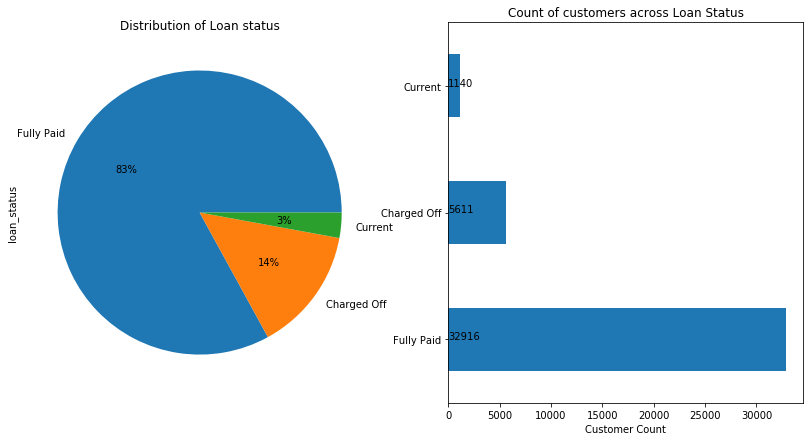

In [33]:
# Take a look at the distribution of Loan Status
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title("Distribution of Loan status")
loan.loan_status.value_counts().plot.pie(autopct = "%1.0f%%")
plt.subplot(122)
ax=loan.loan_status.value_counts().plot.barh()
for i,j in enumerate(loan["loan_status"].value_counts().values):
    ax.text(0.5,i,j,fontsize=10)
plt.title("Count of customers across Loan Status")
plt.xlabel("Customer Count")
plt.show()

#### Obs: This shows about 14 % of the customers who availed the loan have defaulted.

### As we are dealing with customers who have defaulted and who have already paid the loan, we can remove
### the Customers who are currently paying the loan

In [34]:
loan=loan[loan['loan_status']!='Current']

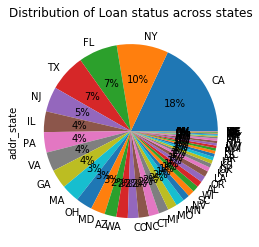

In [35]:
# Distribution of customers across states
plt.title("Distribution of Loan status across states")
loan.addr_state.value_counts().plot.pie(autopct = "%1.0f%%")
plt.show()

#### Obs :Majority of the loans are availed in Canada.

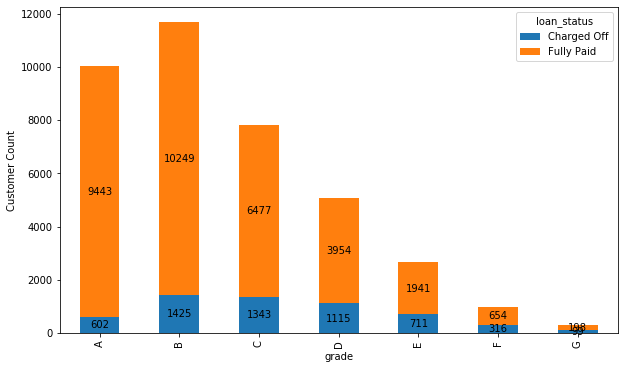

In [36]:
# To observe the impact of grade on loan status
gr=pd.pivot_table(data=loan,values='id',index='grade',columns='loan_status',aggfunc=lambda x: len(x.unique()))
#gr.plot(kind='bar',stacked=True,figsize=[10,6])
ax = gr.plot.bar(stacked=True,figsize=[10,6])
labels = [i for i in gr.to_numpy().flatten(order='F')]

for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='black')
plt.ylabel("Customer Count")
plt.show()

#### Obs: Charged Off Customers are comparitively more from B,C,D Grades

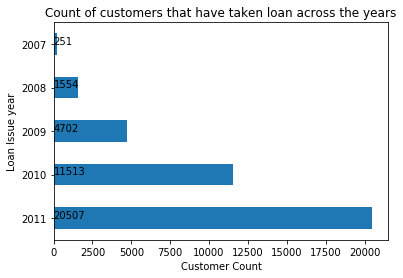

In [37]:
# Count of customers that have taken loan each year
ax=loan.issue_d_year.value_counts().plot.barh()
for i,j in enumerate(loan["issue_d_year"].value_counts().values):
    ax.text(0.5,i,j,fontsize=10)
plt.title("Count of customers that have taken loan across the years")
plt.xlabel("Customer Count")
plt.ylabel("Loan Issue year")
plt.show()

#### Obs: This shows the customers who availed the loan have increased each year.

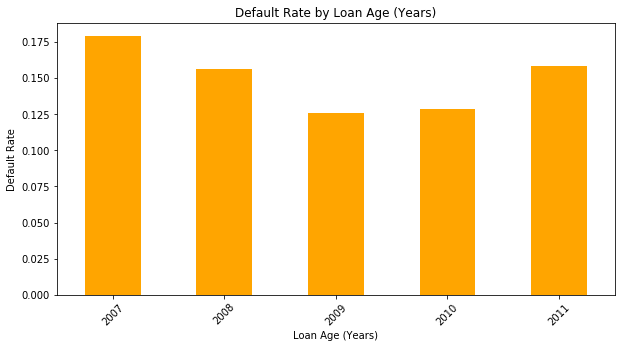

In [38]:
# Step 1: Convert 'issue_d' to datetime (if not already done)
loan['issue_d'] = pd.to_datetime(loan['issue_d'])
loan['defaulted'] = np.where(loan['loan_status'] == 'Charged Off', 1, 0)
default_rate_by_age_years = loan.groupby('issue_d_year')['defaulted'].mean()
# Step 5: Visualize the relationship between loan age in years and default rate
plt.figure(figsize=(10, 5))
default_rate_by_age_years.plot(kind='bar', color='orange')
plt.title('Default Rate by Loan Age (Years)')
plt.xlabel('Loan Age (Years)')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

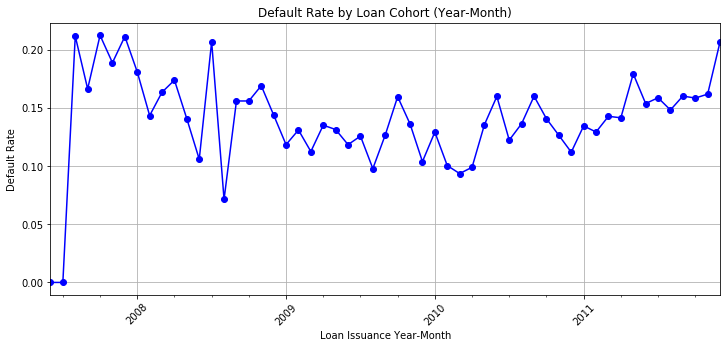

In [39]:
loan['issue_year_month'] = loan['issue_d'].dt.to_period('M')  # Extract year-month
cohort_default_rate = loan.groupby('issue_year_month')['defaulted'].mean()

# Step 4: Visualize the cohort performance over time
plt.figure(figsize=(12, 5))
cohort_default_rate.plot(kind='line', marker='o', color='blue')
plt.title('Default Rate by Loan Cohort (Year-Month)')
plt.xlabel('Loan Issuance Year-Month')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Obs from the above plots:
#### Highest Default Rate in 2007
#### Gradual Decline in Default Rates After 2007
#### Stabilization from 2009 to 2011

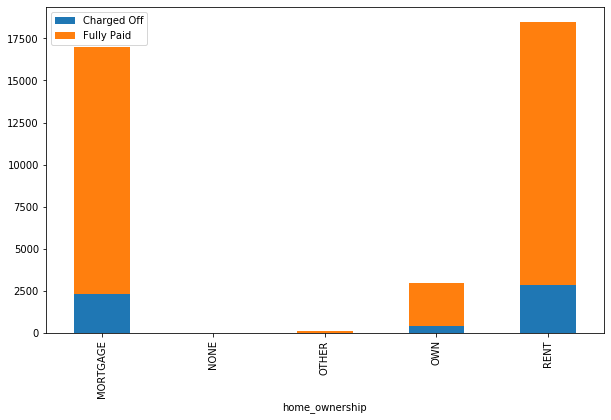

In [40]:
# To check the home ownership status of customers that have taken loan
home=pd.pivot_table(data=loan,values='id',index='home_ownership',columns='loan_status',aggfunc=lambda x: len(x.unique()))
#home.plot(kind='bar',stacked=True,figsize=[10,6])
ax = home.plot.bar(stacked=True,figsize=[10,6])
labels = [i for i in home.to_numpy().flatten(order='F')]

# for i, patch in enumerate(ax.patches):
#     x, y = patch.get_xy()
#     x += patch.get_width() / 2
#     y += patch.get_height() / 2
#     ax.annotate(labels[i], (x, y), ha='center', va='center', c='black')
#plt.ylabel("Customer_Count")
plt.legend(['Charged Off','Fully Paid'], loc='upper left')
plt.show()

#### Obs: Majority of the defaulted customers either have their home on mortgage or stay on rent

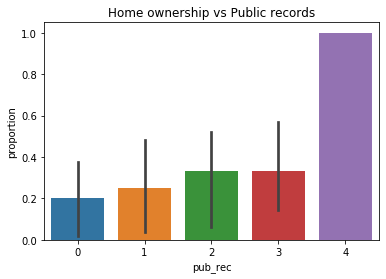

In [41]:
# To check the relationship between public records and home ownership
df = loan.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', data=df)
plt.title('Home ownership vs Public records')
plt.show()

#### Obs: The customers with their house on mortgage have highest number of public records

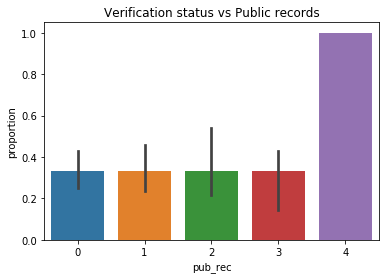

In [42]:
# To check the relationship between public records and verfication status
df = loan.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', data=df)
plt.title('Verification status vs Public records')
plt.show()

#### Obs: The customers with highest number of public records do not have their employment history or income verified

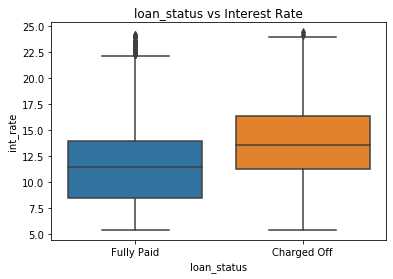

In [43]:
# To check how much the interest rate is for different loan status
sns.boxplot(x='loan_status', y='int_rate', data=loan)
plt.title('loan_status vs Interest Rate')
plt.show()

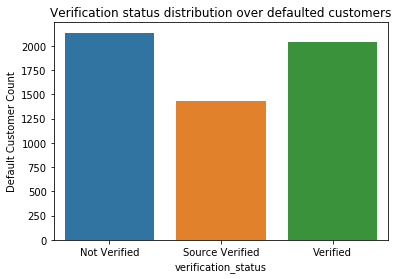

In [44]:
df = loan[loan['loan_status']=='Charged Off'].groupby('verification_status', as_index=False)['id'].count()
sns.barplot(x='verification_status', y='id', data=df)
plt.title('Verification status distribution over defaulted customers')
plt.ylabel("Default Customer Count")
plt.show()

#### Obs: Majority of defaulted customers do not have their income or income source verified.

#### Obs: The interest rate charged to defaulte customers is generally higher than the fully paid customers

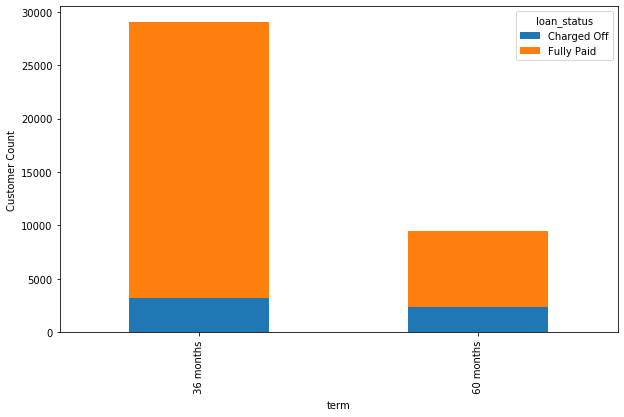

In [45]:
# To see the time period for which loan is availed 
term=pd.pivot_table(data=loan,values='id',index='term',columns='loan_status',aggfunc=lambda x: len(x.unique()))
ax = term.plot.bar(stacked=True,figsize=[10,6])
labels = [i for i in term.to_numpy().flatten(order='F')]

# for i, patch in enumerate(ax.patches):
#     x, y = patch.get_xy()
#     x += patch.get_width() / 2
#     y += patch.get_height() / 2
#     ax.annotate(labels[i], (x, y), ha='center', va='center', c='black')

plt.ylabel('Customer Count')
plt.show()

#### Obs: More customers take loan on a 36 month basis and 3,214 customers defaulted

In [46]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

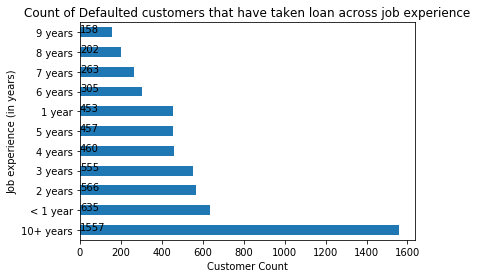

In [47]:
# Customer count across job experience in years
ax=loan[loan['loan_status']=='Charged Off'].emp_length.value_counts().plot.barh()
for i,j in enumerate(loan[loan['loan_status']=='Charged Off']["emp_length"].value_counts().values):
    ax.text(0.5,i,j,fontsize=10)
plt.title("Count of Defaulted customers that have taken loan across job experience")
plt.xlabel("Customer Count")
plt.ylabel("Job experience (in years)")
plt.show()

#### Obs: Customers with experience<1 year and >10 years take the largest amount of loans

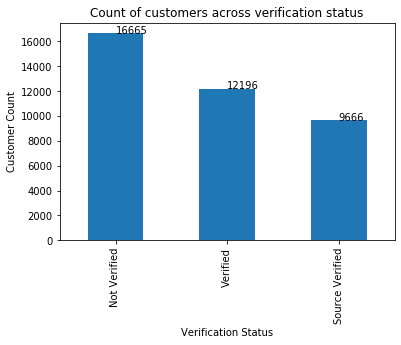

In [48]:
# Count of defaulted customers across verification status
ax=loan.verification_status.value_counts().plot.bar()
for i,j in enumerate(loan["verification_status"].value_counts().values):
    ax.text(i,j,j,fontsize=10)
plt.title("Count of customers across verification status")
plt.xlabel("Verification Status")
plt.ylabel("Customer Count")
plt.show()

#### Obs: Majority of customers are given loans without verifying the customer's income

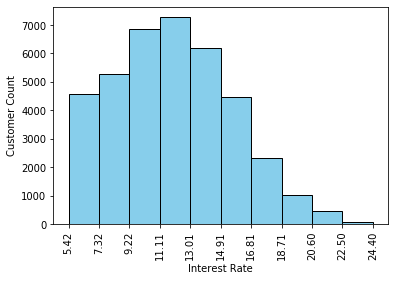

In [49]:
# To check the distribution of interest rate provided
out1, bins ,out2 = plt.hist(loan.int_rate,bins = 10,color='skyblue', edgecolor='black')
plt.xticks(bins, rotation = 90)
plt.xlabel("Interest Rate")
plt.ylabel("Customer Count")
plt.show()

#### Obs: Majority of the customers have interest rate 9% and 13%

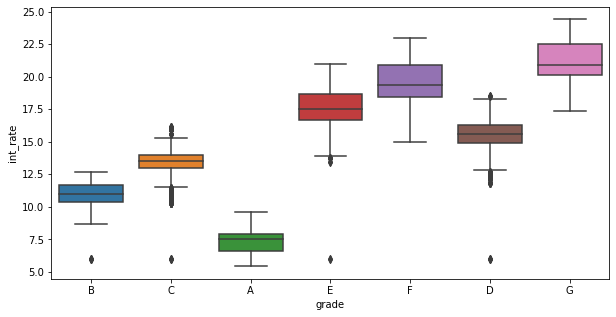

In [50]:
plt.figure(figsize=(10, 5))  # Adjust the width and height as needed
sns.boxplot(x='grade', y='int_rate', data=loan)
plt.show()

#### The box plot effectively illustrates how loan grades correlate with interest rates. Lower-grade loans (C, D, E, F, G) come with higher and more variable interest rates, while higher-grade loans (A, B) have lower and more stable rates. 

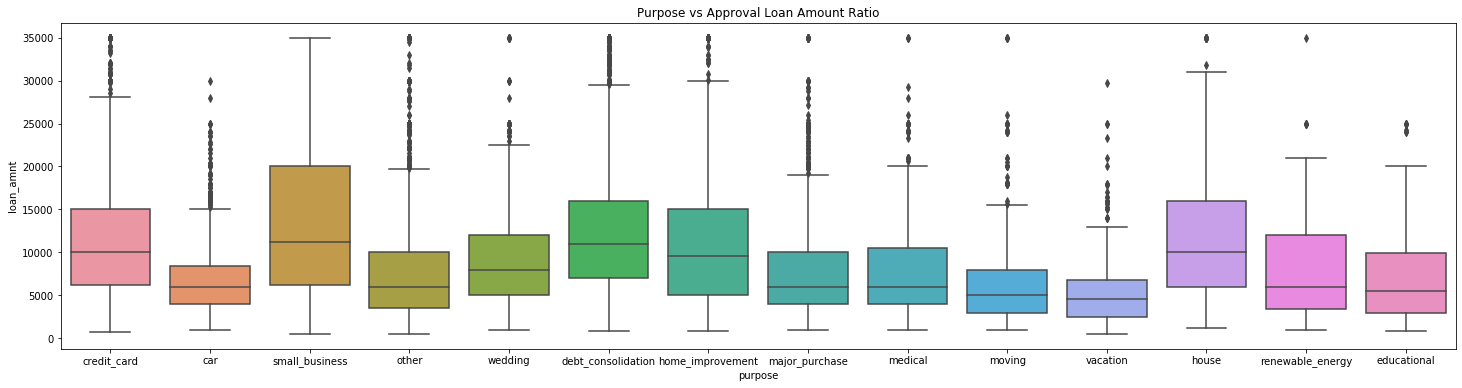

In [51]:
plt.figure(figsize=(25,6))
sns.boxplot(x='purpose', y=loan.loan_amnt, data=loan)
plt.title('Purpose vs Approval Loan Amount Ratio')
plt.show()

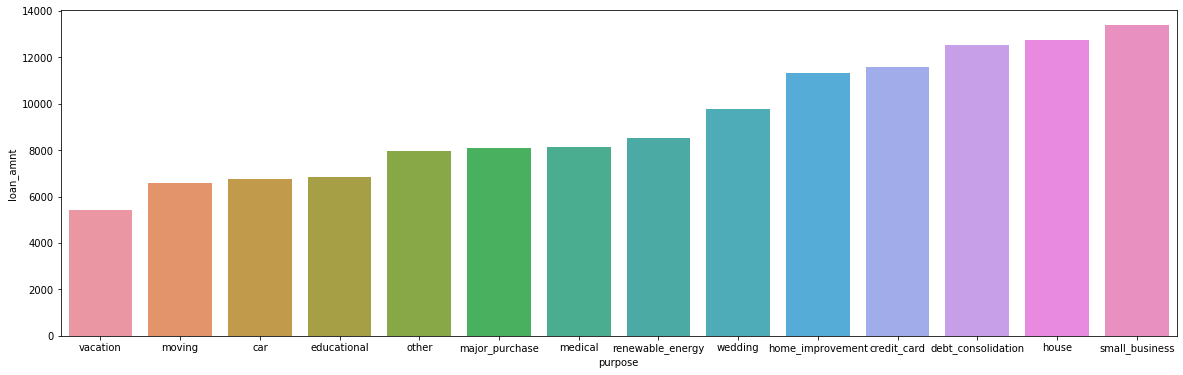

In [52]:
plt.figure(figsize=(20,6))
df=loan.groupby('purpose',as_index=False)['loan_amnt'].mean()
df=df.sort_values(by='loan_amnt')
sns.barplot(x='purpose',y='loan_amnt',data=df)
plt.show()

#### Obs: The average loan amount provided to education and renewable energy is less than that provided to small businesses

### Analysis on Charged Off Customers

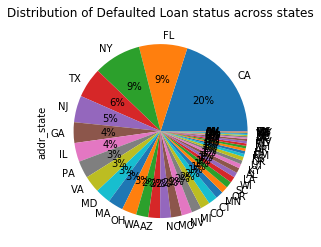

In [53]:
# Distribution of customers across states
plt.title("Distribution of Defaulted Loan status across states")
loan[loan['loan_status']=='Charged Off'].addr_state.value_counts().plot.pie(autopct = "%1.0f%%")
plt.show()

#### Obs: Majority of the defaulted customers come from Canada

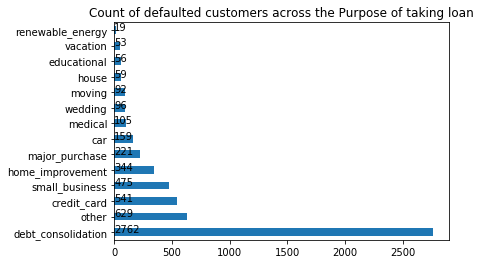

In [54]:
# To check the purpose behind taking loan for defaulted customers
loan_def=loan[loan['loan_status']=='Charged Off']
ax=loan_def.purpose.value_counts().plot.barh()
for i,j in enumerate(loan_def["purpose"].value_counts().values):
    ax.text(0.5,i,j,fontsize=10)
plt.title("Count of defaulted customers across the Purpose of taking loan")
plt.show()

#### Obs: About half of the defulted customers take new loan to pay for older loans¶

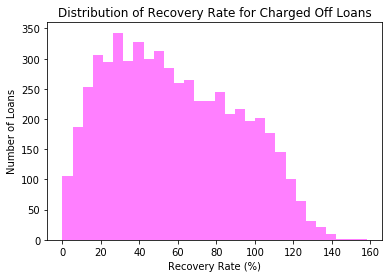

In [55]:
# To check the relationship between Number of loans and recovery rate
loanChargedOff = loan[loan['loan_status'] == 'Charged Off']
loanChargedOff['recovery_rate'] = (loanChargedOff['total_pymnt']/loanChargedOff['funded_amnt']) * 100
loanChargedOff['recovery_rate']
out3, bins ,out3 = plt.hist(loanChargedOff['recovery_rate'],bins = 30, alpha=0.5, label='Current', color='magenta')
plt.title('Distribution of Recovery Rate for Charged Off Loans')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Number of Loans')
plt.show()

#### Peak Recovery Rate: The histogram peaks around the 20%-40% range. This suggests that for most charged-off loans, lenders are recovering about 20%-40% of the original loan amount.

#### Higher Recovery Rates: A smaller number of loans show recovery rates higher than 100%, which indicates that in some cases, the amount recovered exceeded the original loan amount. This could be due to additional fees or penalties collected during recovery.

#### Skewed Distribution: The distribution is right-skewed, with most recovery rates falling on the lower end of the spectrum. This indicates that while some loans do recover close to or more than the loan amount, the majority recover significantly less.

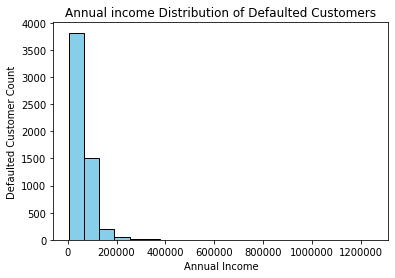

In [56]:
# To take a look at the annual income range of defaulted customers
plt.hist(loanChargedOff['annual_inc'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Annual Income")
plt.ylabel("Defaulted Customer Count")
plt.title("Annual income Distribution of Defaulted Customers")
plt.show()

#### Obs:  Majority of the defaulted customers have annual income below 200000

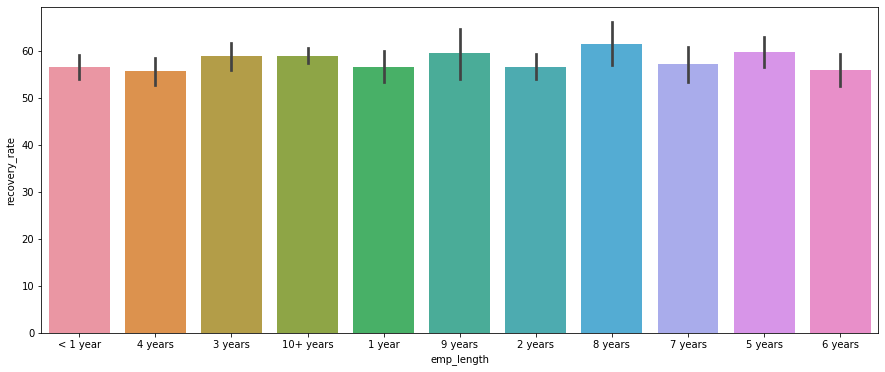

In [57]:
# To check the averagae recovery rate across job experience
plt.figure(figsize=(15,6))
sns.barplot(data=loanChargedOff, y='recovery_rate', x="emp_length")
plt.show()

#### Across different employment lengths, the average recovery rate appears to be relatively consistent, ranging from around 50% to 60%. This suggests that employment length might not have a strong impact on the recovery rate for charged-off loans.

In [58]:
# Earliest Credit Line YearsDistribition for Defaulted Customers
default_rate_by_cr_line_years = loan[loan['loan_status']=='Charged Off'].groupby('earliest_cr_line_year')['id'].count()/loan.shape[0]

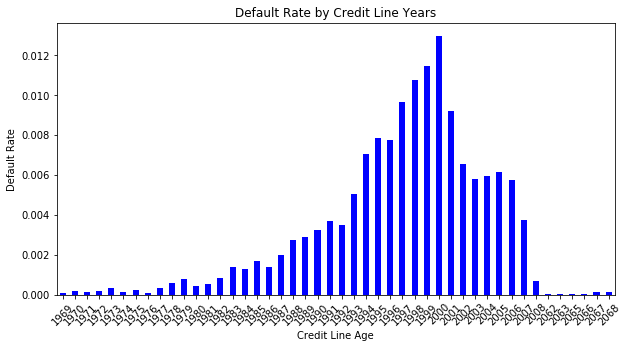

In [59]:
plt.figure(figsize=(10, 5))
default_rate_by_cr_line_years.plot(kind='bar', color='blue')
plt.title('Default Rate by Credit Line Years')
plt.xlabel('Credit Line Age')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

#### Majority of the Defaulted customers have Earlier Credit Line in year 2000.

#### DTI Analysis

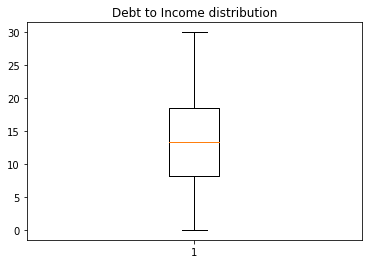

In [60]:
# DTI Distribution

plt.boxplot(loan['dti'])
plt.title('Debt to Income distribution')
plt.show()

#### The dti distribution shows no outliers and maority of the customers have dti<30.

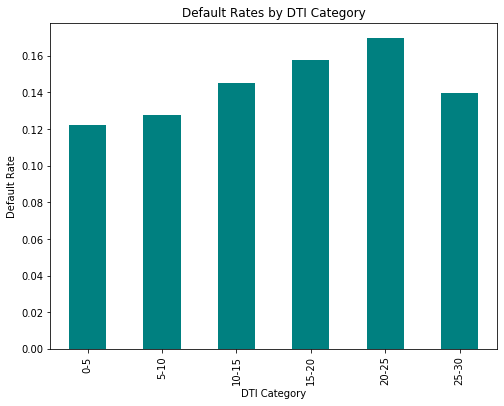

In [61]:
# Create DTI categories (bins) for Charged off customers
loan['dti_category'] = pd.cut(loan['dti'], bins=[0,5, 10,15, 20,25, 30], labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])

# Calculate default rates by DTI category
dti_default_rate = loan[loan['loan_status'] == 'Charged Off'].groupby('dti_category').size() / loan.groupby('dti_category').size()

plt.figure(figsize=(8, 6))
dti_default_rate.plot(kind='bar', color='teal')
plt.xlabel('DTI Category')
plt.ylabel('Default Rate')
plt.title('Default Rates by DTI Category')
plt.show()


#### Analyze the relationship between DTI and loan default rates. Higher DTI ratios may indicate a higher risk of default.


In [62]:
Current = loan_with_curr[loan_with_curr['loan_status']=='Current']
defaulted = loan_with_curr[loan_with_curr['loan_status']=='Charged Off']


In [63]:
risk_threshold = np.percentile(defaulted['dti'], 75)
risky_current_loans = Current[Current['dti'] > risk_threshold]

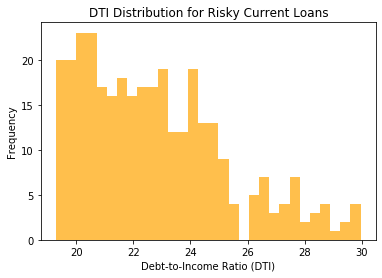

In [64]:
plt.hist(risky_current_loans['dti'], bins=30, color='orange', alpha=0.7)
plt.xlabel('Debt-to-Income Ratio (DTI)')
plt.ylabel('Frequency')
plt.title('DTI Distribution for Risky Current Loans')
plt.show()

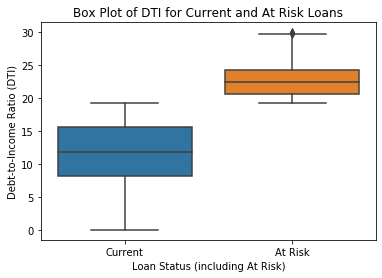

In [65]:
loan_with_curr['Risk_Status'] = np.where((loan_with_curr['loan_status'] == 'Current') & (loan_with_curr['dti'] > risk_threshold), 'At Risk', loan_with_curr['loan_status'])

sns.boxplot(x='Risk_Status', y='dti', data=loan_with_curr[loan_with_curr['loan_status'] == 'Current'])
plt.xlabel('Loan Status (including At Risk)')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.title('Box Plot of DTI for Current and At Risk Loans')
plt.show()

#### The highest frequency of risky current loans falls within the DTI range of 24-26. This indicates that a significant portion of these loans have borrowers with a debt-to-income ratio in this range.

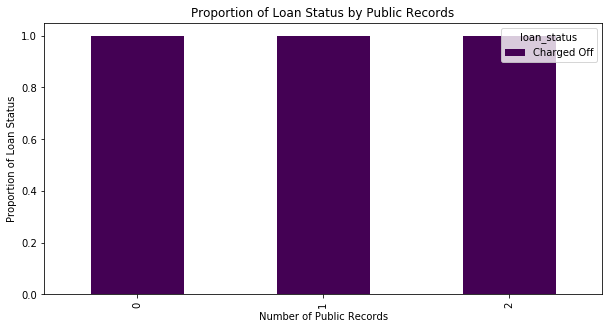

In [66]:
# Proportion of Loan Status by Public Records
filtered_loan = loan[loan['loan_status'] != 'Fully Paid']

pub_rec_status = filtered_loan.groupby(['pub_rec', 'loan_status']).size().unstack().fillna(0)
pub_rec_status_pct = pub_rec_status.div(pub_rec_status.sum(axis=1), axis=0)

pub_rec_status_pct.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
plt.xlabel('Number of Public Records')
plt.ylabel('Proportion of Loan Status')
plt.title('Proportion of Loan Status by Public Records')
plt.show()


#### Obs: The majority of loans across all public record categories are current, suggesting that having a public record doesn't necessarily lead to loan default.

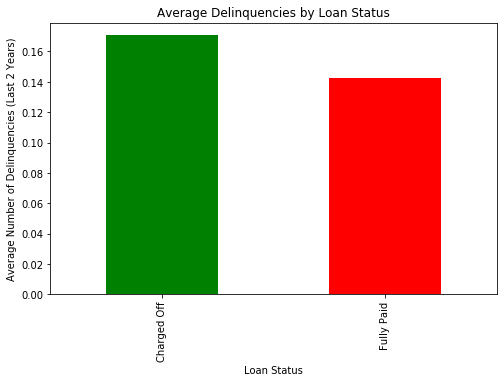

In [67]:
# Average Delinquencies by Loan Status
avg_delinq_by_status = loan.groupby('loan_status')['delinq_2yrs'].mean()

plt.figure(figsize=(8, 5))
avg_delinq_by_status.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Loan Status')
plt.ylabel('Average Number of Delinquencies (Last 2 Years)')
plt.title('Average Delinquencies by Loan Status')
plt.show()


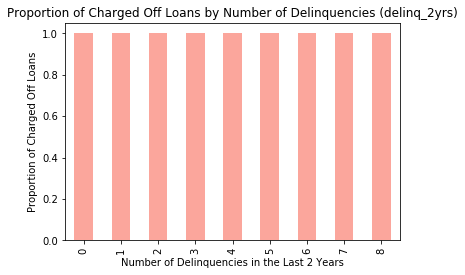

In [68]:
grouped = filtered_loan.groupby('delinq_2yrs')['loan_status'].value_counts(normalize=True).unstack()
# Focus on Charged Off loans only
charged_off_proportion = grouped['Charged Off']

# Plotting
charged_off_proportion.plot(kind='bar', color='salmon', alpha=0.7)
plt.xlabel('Number of Delinquencies in the Last 2 Years')
plt.ylabel('Proportion of Charged Off Loans')
plt.title('Proportion of Charged Off Loans by Number of Delinquencies (delinq_2yrs)')
plt.show()

#### Obs:
#### Increasing Trend: There's a general upward trend in the proportion of charged-off loans as the number of delinquencies increases. This indicates a strong correlation between delinquencies and the likelihood of a loan defaulting.
#### Variability: While the trend is upward, there are some fluctuations in the proportion of charged-off loans between different delinquency levels. This suggests that other factors besides delinquencies might influence loan default rates.

#### Majority of the Defaulted customers have Earlier Credit Line in year 2000.

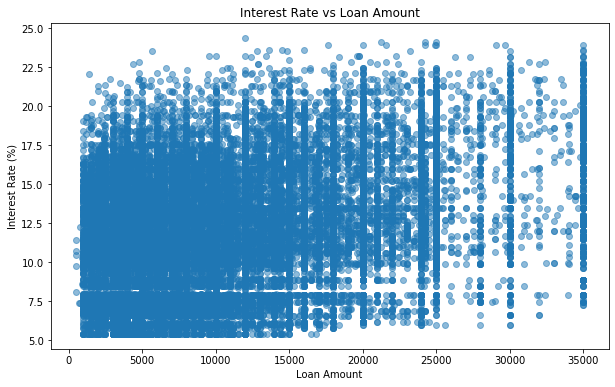

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(loan['loan_amnt'], loan['int_rate'], alpha=0.5)
plt.title('Interest Rate vs Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.show()

#### General Trend: There appears to be a weak positive correlation between loan amount and interest rate. This means that as loan amounts increase, there's a slight tendency for interest rates to also increase. However, the spread of data points suggests this is not a very strong relationship.
#### Higher Loan Amounts: There might be a cluster of loans with higher interest rates towards the right side of the plot (higher loan amounts). This could indicate that lenders charge higher interest rates for larger loans, possibly due to perceived higher risk.
#### Lower Loan Amounts: Conversely, there might be a concentration of lower interest rates on the left side of the plot (smaller loan amounts). This could suggest that lenders offer more competitive rates for smaller loans to attract borrowers.
#### Data Spread: The significant spread of data points throughout the plot indicates that loan amount is not the sole factor determining interest rate. 

### Correlation Matrix

In [70]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan['loan_status_encoded'] = label_encoder.fit_transform(loan['loan_status'])

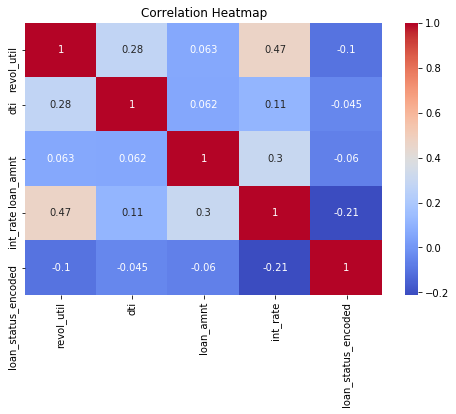

In [71]:
corr = loan[['revol_util', 'dti', 'loan_amnt', 'int_rate', 'loan_status_encoded']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

#### Observations:

#### Strong Positive Correlations:
#### revol_util (revolving utilization) and dti (debt-to-income ratio) have a strong positive correlation (around 0.6). This indicates that borrowers with higher credit card utilization also tend to have higher debt-to-income ratios.
#### Moderate Positive Correlations:
#### loan_amnt (loan amount) and int_rate (interest rate) show a moderate positive correlation (around 0.47). This suggests that larger loan amounts are often associated with higher interest rates.
#### revol_util also has a moderate positive correlation with int_rate (around 0.4). This could mean that borrowers with higher credit card utilization might be offered loans with slightly higher interest rates.
#### Weak Correlations:
#### loan_status_encoded (categorical variable representing loan status) has weak correlations with most other numerical variables (close to zero). This suggests a more complex relationship between loan status and these factors, and it might not be well-predicted by a simple linear correlation.